In [131]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import networkx as nx

from opt_utils import *
from linalg_utils import remove_small_eigenvalues

In [132]:
import os
folder = os.path.abspath(os.getcwd())

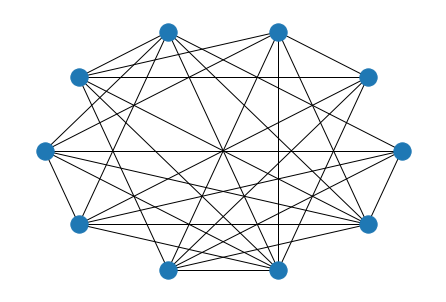

In [133]:
graph_file = "hamming6-2.mtx"
graph_type = 1

n = 10
G = nx.complement(load_graph(graph_file, graph_type, n))

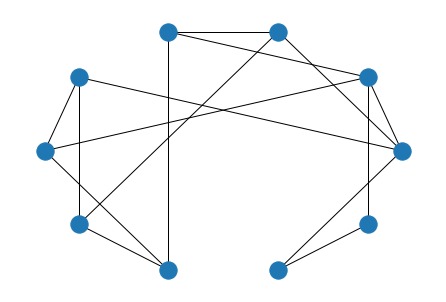

In [134]:
nx.draw(G, nx.circular_layout(G))


## Lovasz

In [135]:
prob_lovasz, Z = lovasz_sdp(G)

5.000000056878669


In [136]:
np.linalg.eigvalsh(Z.value)

array([-5.35799042e-09, -2.53859435e-09, -2.22369667e-09, -1.88753591e-09,
       -2.13990674e-10,  3.17982247e-09,  4.31661269e-09,  1.34825213e-08,
        4.99992690e-01,  5.00007296e-01])

In [137]:
Z_val = remove_small_eigenvalues(Z.value)

In [138]:
Z_center = 1 / n * np.eye(n)

### Fixed point iteration

In [139]:
Z_path = fixed_point_iteration(prob_lovasz, Z, -Z_center, returns_path=True, verbose=True)

initial objective: 5.000000
initial eigenvalues:
[-5.35799042e-09 -2.53859435e-09 -2.22369667e-09 -1.88753591e-09
 -2.13990674e-10  3.17982247e-09  4.31661269e-09  1.34825213e-08
  4.99992690e-01  5.00007296e-01]
current objective: 5.000000
current eigenvalues:
[2.70727642e-10 2.70727720e-10 2.70727764e-10 2.70727791e-10
 2.70727831e-10 2.70727874e-10 2.70727877e-10 2.70728014e-10
 1.13574641e-04 9.99886422e-01]
current objective: 5.000000
current eigenvalues:
[-1.47780913e-11 -1.47725805e-11 -1.47724908e-11 -1.47724261e-11
 -1.47724123e-11 -1.47724103e-11 -1.47724070e-11 -1.47723368e-11
 -1.47722796e-11  1.00000000e+00]
fixed point objective: 5.000000
fixed point eigenvalues:
[-1.48153392e-11 -1.48152674e-11 -1.48152436e-11 -1.48152431e-11
 -1.48152429e-11 -1.48152422e-11 -1.48151989e-11 -1.48151921e-11
 -1.48151459e-11  1.00000000e+00]
iterations:  3


In [140]:
Z_fixed_point = Z.value
Z.value = Z_val

In [141]:
Z_fixed_point

array([[ 1.99996969e-01, -9.83300233e-19, -1.81899441e-18,
         2.00000164e-01, -1.01481503e-19,  2.00000164e-01,
         1.99994302e-01, -2.42939096e-19,  7.55430274e-19,
         2.00000824e-01],
       [-9.83300233e-19, -1.48152426e-11,  1.56680476e-19,
         1.19206752e-19,  1.10780518e-19, -6.52277530e-20,
         2.92251674e-19,  1.58625061e-20, -8.88566409e-19,
         9.60903758e-19],
       [-1.81899441e-18,  1.56680476e-19, -1.48152430e-11,
         2.17215847e-18,  2.49912896e-19,  4.12713735e-19,
        -3.27754905e-19, -1.78478531e-20, -8.72127315e-19,
         5.80449680e-19],
       [ 2.00000164e-01,  1.19206752e-19,  2.17215847e-18,
         2.00003359e-01,  1.84473648e-18,  2.00003359e-01,
         1.99997497e-01, -6.47239486e-19, -8.34271673e-18,
         2.00004018e-01],
       [-1.01481503e-19,  1.10780518e-19,  2.49912896e-19,
         1.84473648e-18, -1.48152429e-11, -1.83021356e-19,
         2.79962507e-19,  7.43065246e-20, -3.19777508e-19,
        -4.

In [142]:
try:
    Z_vec = recover_incidence_vector(Z_fixed_point, "lovasz")
    nx.draw(G, nx.circular_layout(G), node_color=Z_vec)
except:
    print("recovery failed")

recovery failed


## Grotschel

In [143]:
prob_grotschel, X, X_plus = grotschel_sdp(G)

5.000000011770449


In [144]:
X_val = remove_small_eigenvalues(X.value)

In [145]:
X_val

array([[ 4.99999731e-01, -1.25732226e-10,  8.26009944e-11,
         4.99999731e-01,  8.26010033e-11,  4.99999731e-01,
         4.99999731e-01,  1.87920928e-10,  5.29989741e-10,
         4.99999731e-01],
       [-1.25732227e-10,  5.00000271e-01,  5.00000272e-01,
         8.26017836e-11,  5.00000272e-01,  8.26017215e-11,
         1.87921529e-10,  5.00000272e-01,  5.00000271e-01,
         5.29989965e-10],
       [ 8.26009944e-11,  5.00000272e-01,  5.00000272e-01,
         2.90935005e-10,  5.00000272e-01,  2.90934943e-10,
         3.96254750e-10,  5.00000272e-01,  5.00000272e-01,
         7.38323186e-10],
       [ 4.99999731e-01,  8.26017835e-11,  2.90935005e-10,
         4.99999731e-01,  2.90935014e-10,  4.99999731e-01,
         4.99999731e-01,  3.96254939e-10,  7.38323751e-10,
         4.99999731e-01],
       [ 8.26010033e-11,  5.00000272e-01,  5.00000272e-01,
         2.90935014e-10,  5.00000272e-01,  2.90934951e-10,
         3.96254759e-10,  5.00000272e-01,  5.00000272e-01,
         7.

In [146]:
prob_center_grotschel = cp.Problem(cp.Maximize(cp.log_det(X_plus)), prob_grotschel.constraints)

prob_center_grotschel.solve()

X_center = X.value

X.value = X_val

In [147]:
X_center

array([[2.52755602e-01, 3.02131105e-10, 5.14477627e-10, 1.16997830e-01,
        5.23716858e-10, 1.16995548e-01, 1.17442388e-01, 3.51398683e-02,
        6.33502081e-10, 1.26369912e-01],
       [3.02131105e-10, 2.52757167e-01, 1.16999905e-01, 3.86417317e-10,
        1.16998653e-01, 3.80862175e-10, 3.51447894e-02, 1.17443727e-01,
        1.26376579e-01, 5.20354546e-10],
       [5.14477627e-10, 1.16999905e-01, 2.84371124e-01, 4.67513007e-10,
        1.30585937e-01, 4.22303609e-02, 4.07907802e-10, 1.31095282e-01,
        1.19567052e-01, 6.10686822e-02],
       [1.16997830e-01, 3.86417317e-10, 4.67513007e-10, 2.84372307e-01,
        4.22300884e-02, 1.30584595e-01, 1.31099225e-01, 5.33002340e-10,
        6.10723974e-02, 1.19562340e-01],
       [5.23716858e-10, 1.16998653e-01, 1.30585937e-01, 4.22300884e-02,
        2.84370651e-01, 4.56084453e-10, 4.23708515e-10, 1.31095737e-01,
        1.19566600e-01, 6.10691650e-02],
       [1.16995548e-01, 3.80862175e-10, 4.22303609e-02, 1.30584595e-01,
   

### Fixed point iteration

In [148]:
X_path = fixed_point_iteration(prob_grotschel, X, -X_center, returns_path=True, verbose=True)

initial objective: 5.000000
initial eigenvalues:
[-3.70410293e-16 -1.32879828e-16 -8.74045080e-17  2.04517748e-18
  3.61057943e-17  8.93821133e-17  1.38332738e-16  2.78237601e-16
  2.49999865e+00  2.50000136e+00]
current objective: 5.000000
current eigenvalues:
[-4.20298304e-10 -3.70658468e-10 -3.45102764e-10 -3.22355540e-10
 -3.12837756e-10 -2.44945863e-10 -2.20600936e-10 -1.88874106e-10
  4.60253490e-03  4.99539747e+00]
current objective: 5.000000
current eigenvalues:
[-1.22474205e-09 -1.12642850e-09 -1.06770493e-09 -1.05322152e-09
 -5.53477891e-10  5.09584072e-10  6.84601955e-10  1.21222671e-09
  1.75319915e-09  5.00000001e+00]
fixed point objective: 5.000000
fixed point eigenvalues:
[-1.23529899e-09 -1.13554694e-09 -1.07645889e-09 -1.06180480e-09
 -5.58132164e-10  5.13907021e-10  6.90674093e-10  1.22277266e-09
  1.76609003e-09  5.00000001e+00]
iterations:  3


In [149]:
X_fixed_point = X.value
X.value = X_val

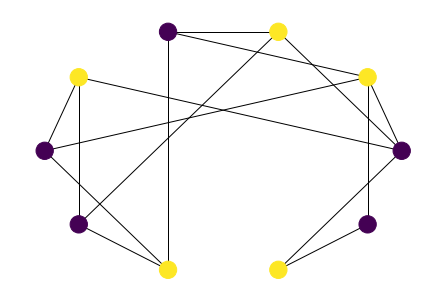

In [150]:
try:
    X_vec = recover_incidence_vector(X_fixed_point, "grotschel")
    nx.draw(G, nx.circular_layout(G), node_color=X_vec)
except:
    print("recovery failed")

## Benson & Ye

In [151]:
prob_benson, V = benson_sdp(G)

4.999999998961008


In [152]:
V_val = remove_small_eigenvalues(V.value)

In [153]:
prob_center_benson = cp.Problem(cp.Maximize(cp.log_det(V)), prob_benson.constraints)

prob_center_benson.solve()

V_center = V.value
V.value = V_val

### Fixed point iteration

In [154]:
V_path = fixed_point_iteration(prob_benson, V, -V_center, returns_path=True, verbose=True)

initial objective: 5.000000
initial eigenvalues:
[-2.15775238e-15 -2.18056241e-16 -8.36956470e-17 -6.22561630e-17
 -2.87727259e-21  9.16068926e-30  7.77335333e-17  2.15329720e-16
  5.26972779e-16  1.00000000e+00  1.00000000e+01]
current objective: 5.000000
current eigenvalues:
[-4.03242688e-09 -2.30356707e-09 -1.97854146e-09 -1.87177804e-09
 -1.37912795e-09 -1.13355045e-09 -8.35942820e-10 -7.62148033e-10
 -1.15024788e-10  2.13227258e-03  1.09978676e+01]
current objective: 5.000000
current eigenvalues:
[-1.39397392e-08 -1.13911925e-08 -7.39434661e-09 -5.28280058e-09
 -5.13508337e-09 -3.85856120e-09 -2.54176283e-09 -1.89312494e-09
 -1.58566831e-09 -8.52073820e-10  1.09999999e+01]
fixed point objective: 5.000000
fixed point eigenvalues:
[-1.39303044e-08 -1.13802459e-08 -7.37912255e-09 -5.26874335e-09
 -5.12137083e-09 -3.84791967e-09 -2.52799424e-09 -1.88222136e-09
 -1.57534590e-09 -8.42985683e-10  1.09999999e+01]
iterations:  3


In [155]:
V_fixed_point = V.value
V.value = V_val

In [166]:
np.diag(V_fixed_point)

array([0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
       0.99999999])

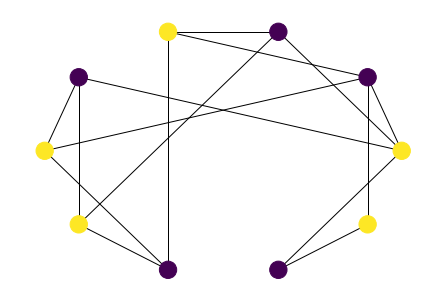

In [156]:
try:
    V_vec = recover_incidence_vector(V_fixed_point, "benson")
    nx.draw(G, nx.circular_layout(G), node_color=V_vec)
except:
    print("recovery failed")

# SDP sampling

In [157]:
Z_samples = sdp_sampling(prob_lovasz, Z, "lovasz", folder, graph_file, 0)

In [158]:
X_samples = sdp_sampling(prob_grotschel, X, "grotschel", folder, graph_file, 0)

In [159]:
V_samples = sdp_sampling(prob_benson, V, "benson", folder, graph_file, 0)

In [160]:
row = 0
col = 1

### Lovasz

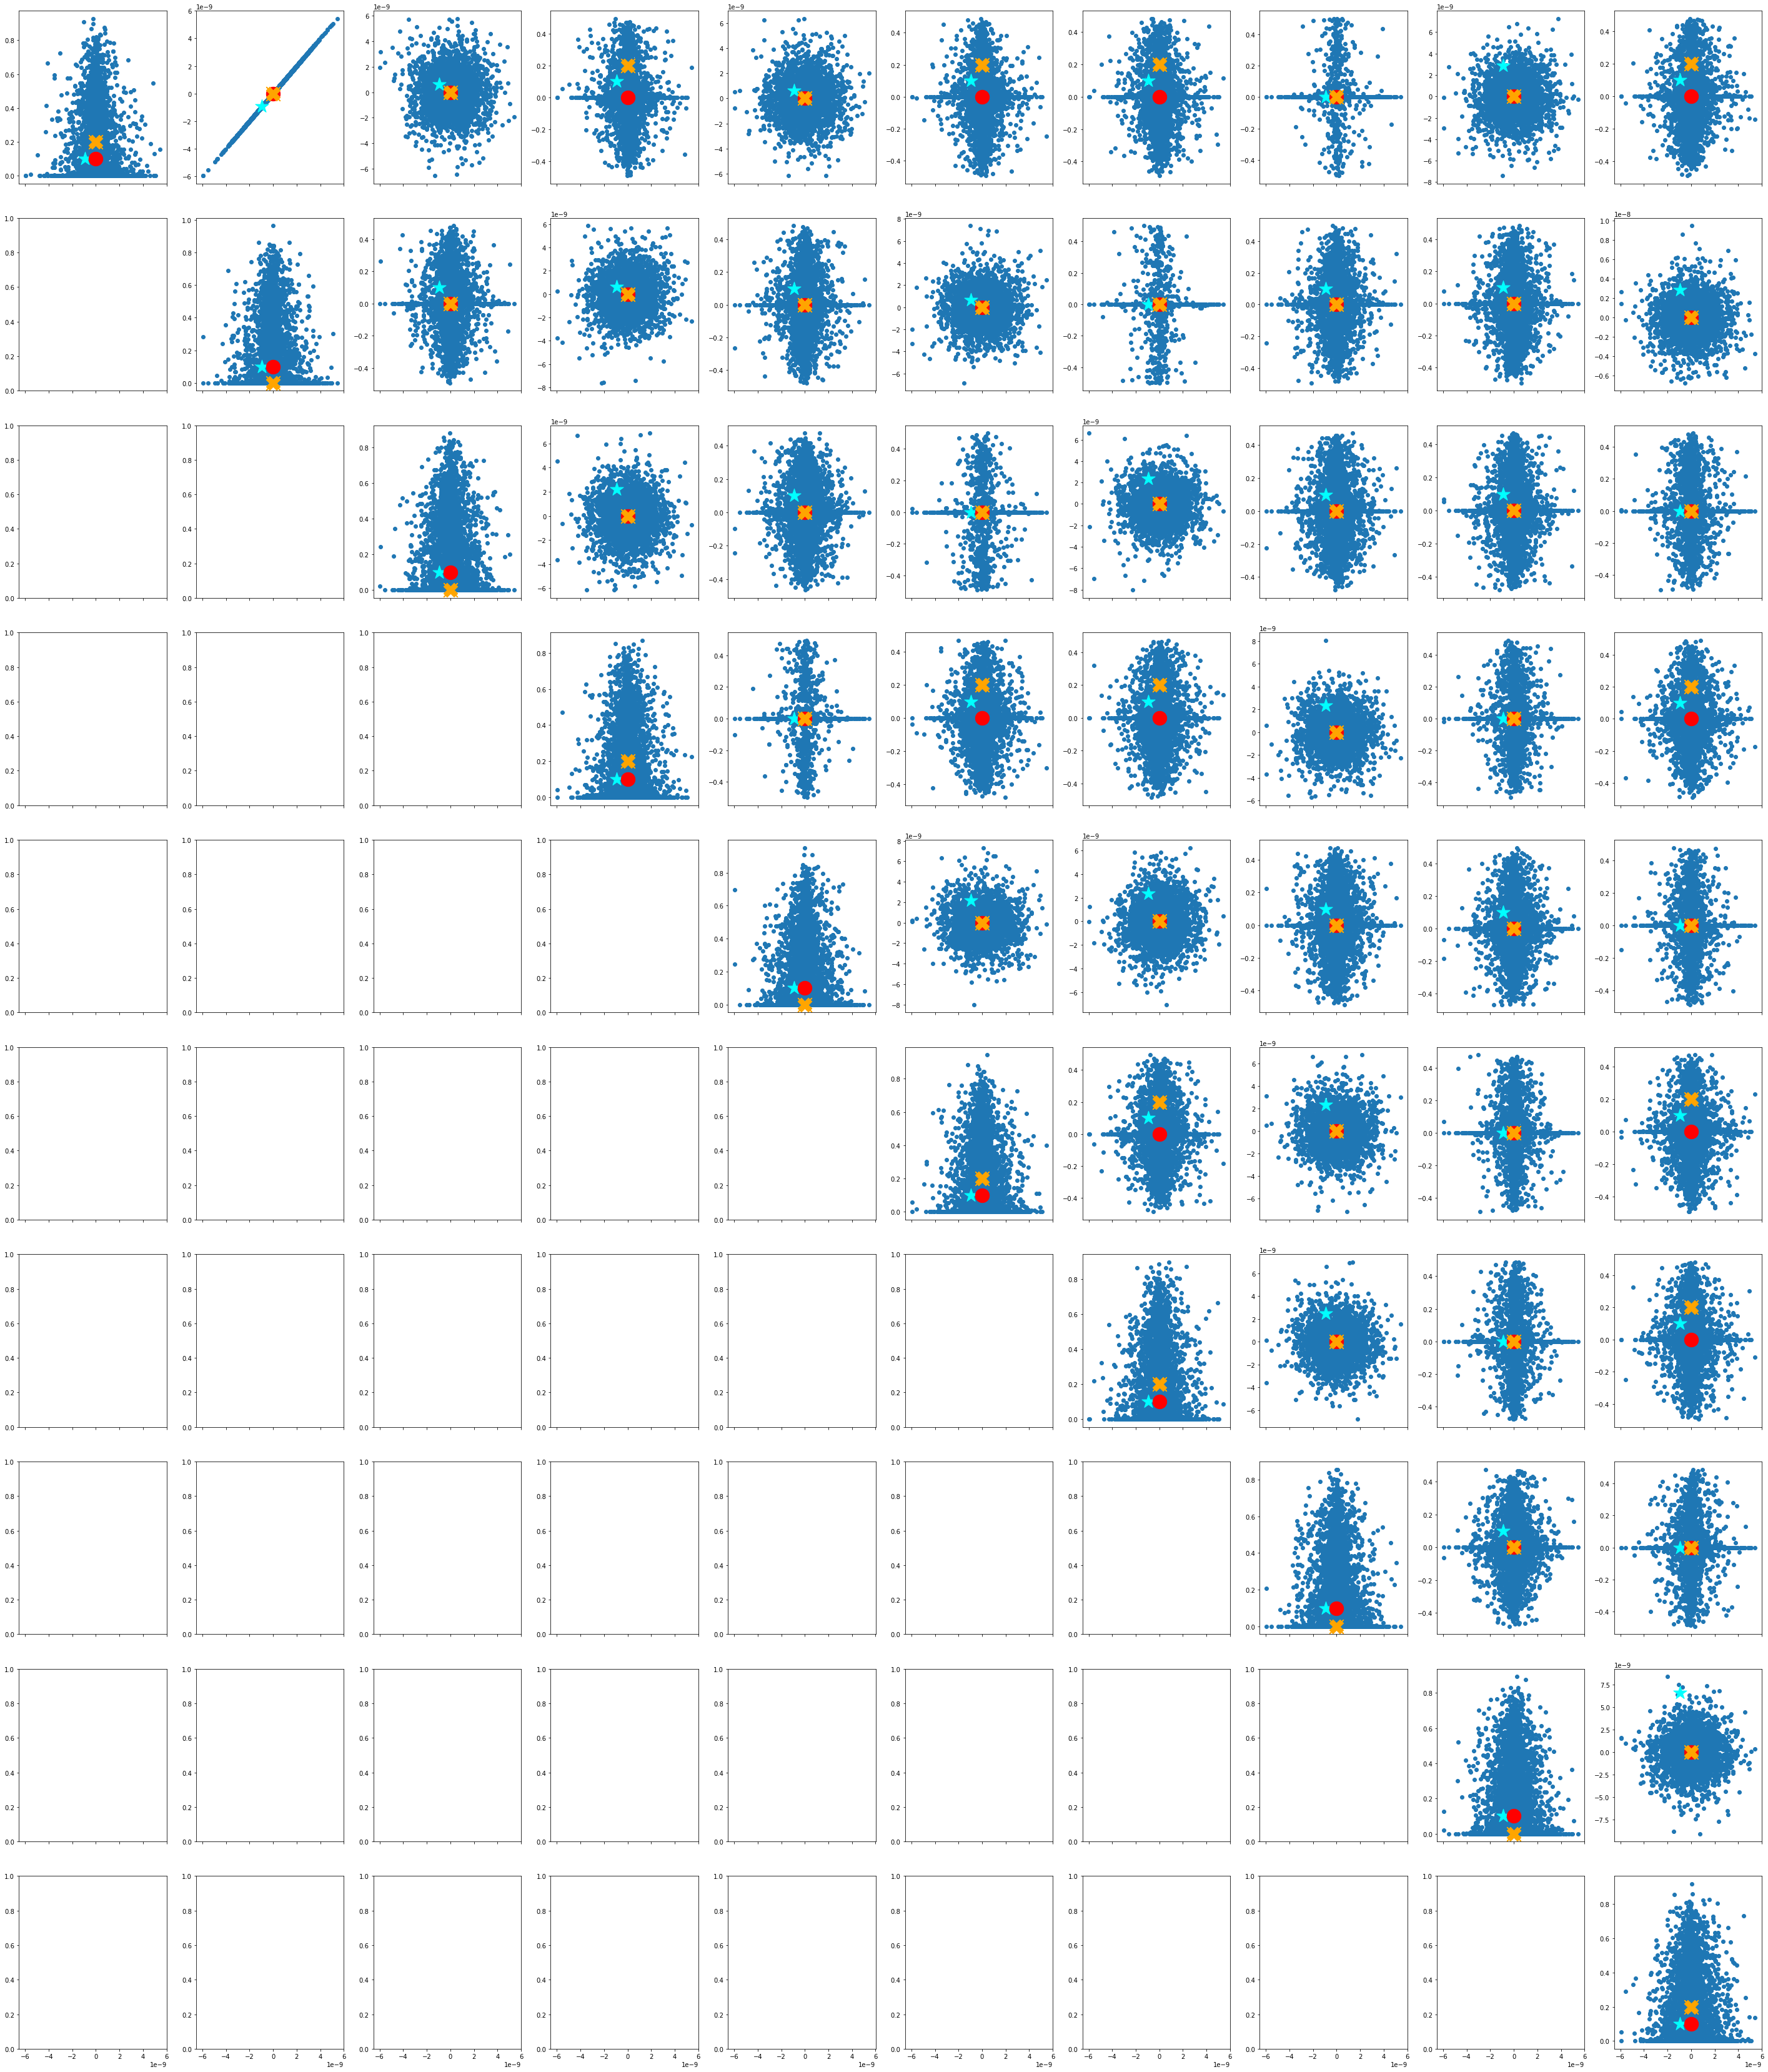

In [161]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for i in range(n):
    for j in range(i, n):
        axs[i, j].scatter(Z_samples[:, row, col], Z_samples[:, i, j])
        axs[i, j].scatter(Z_val[row, col], Z_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(Z_center[row, col], Z_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(Z_fixed_point[row, col], Z_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(Z_path[:, row, col], Z_path[:, i, j], c="orange", s=5e2, marker="x")

### Grotschel

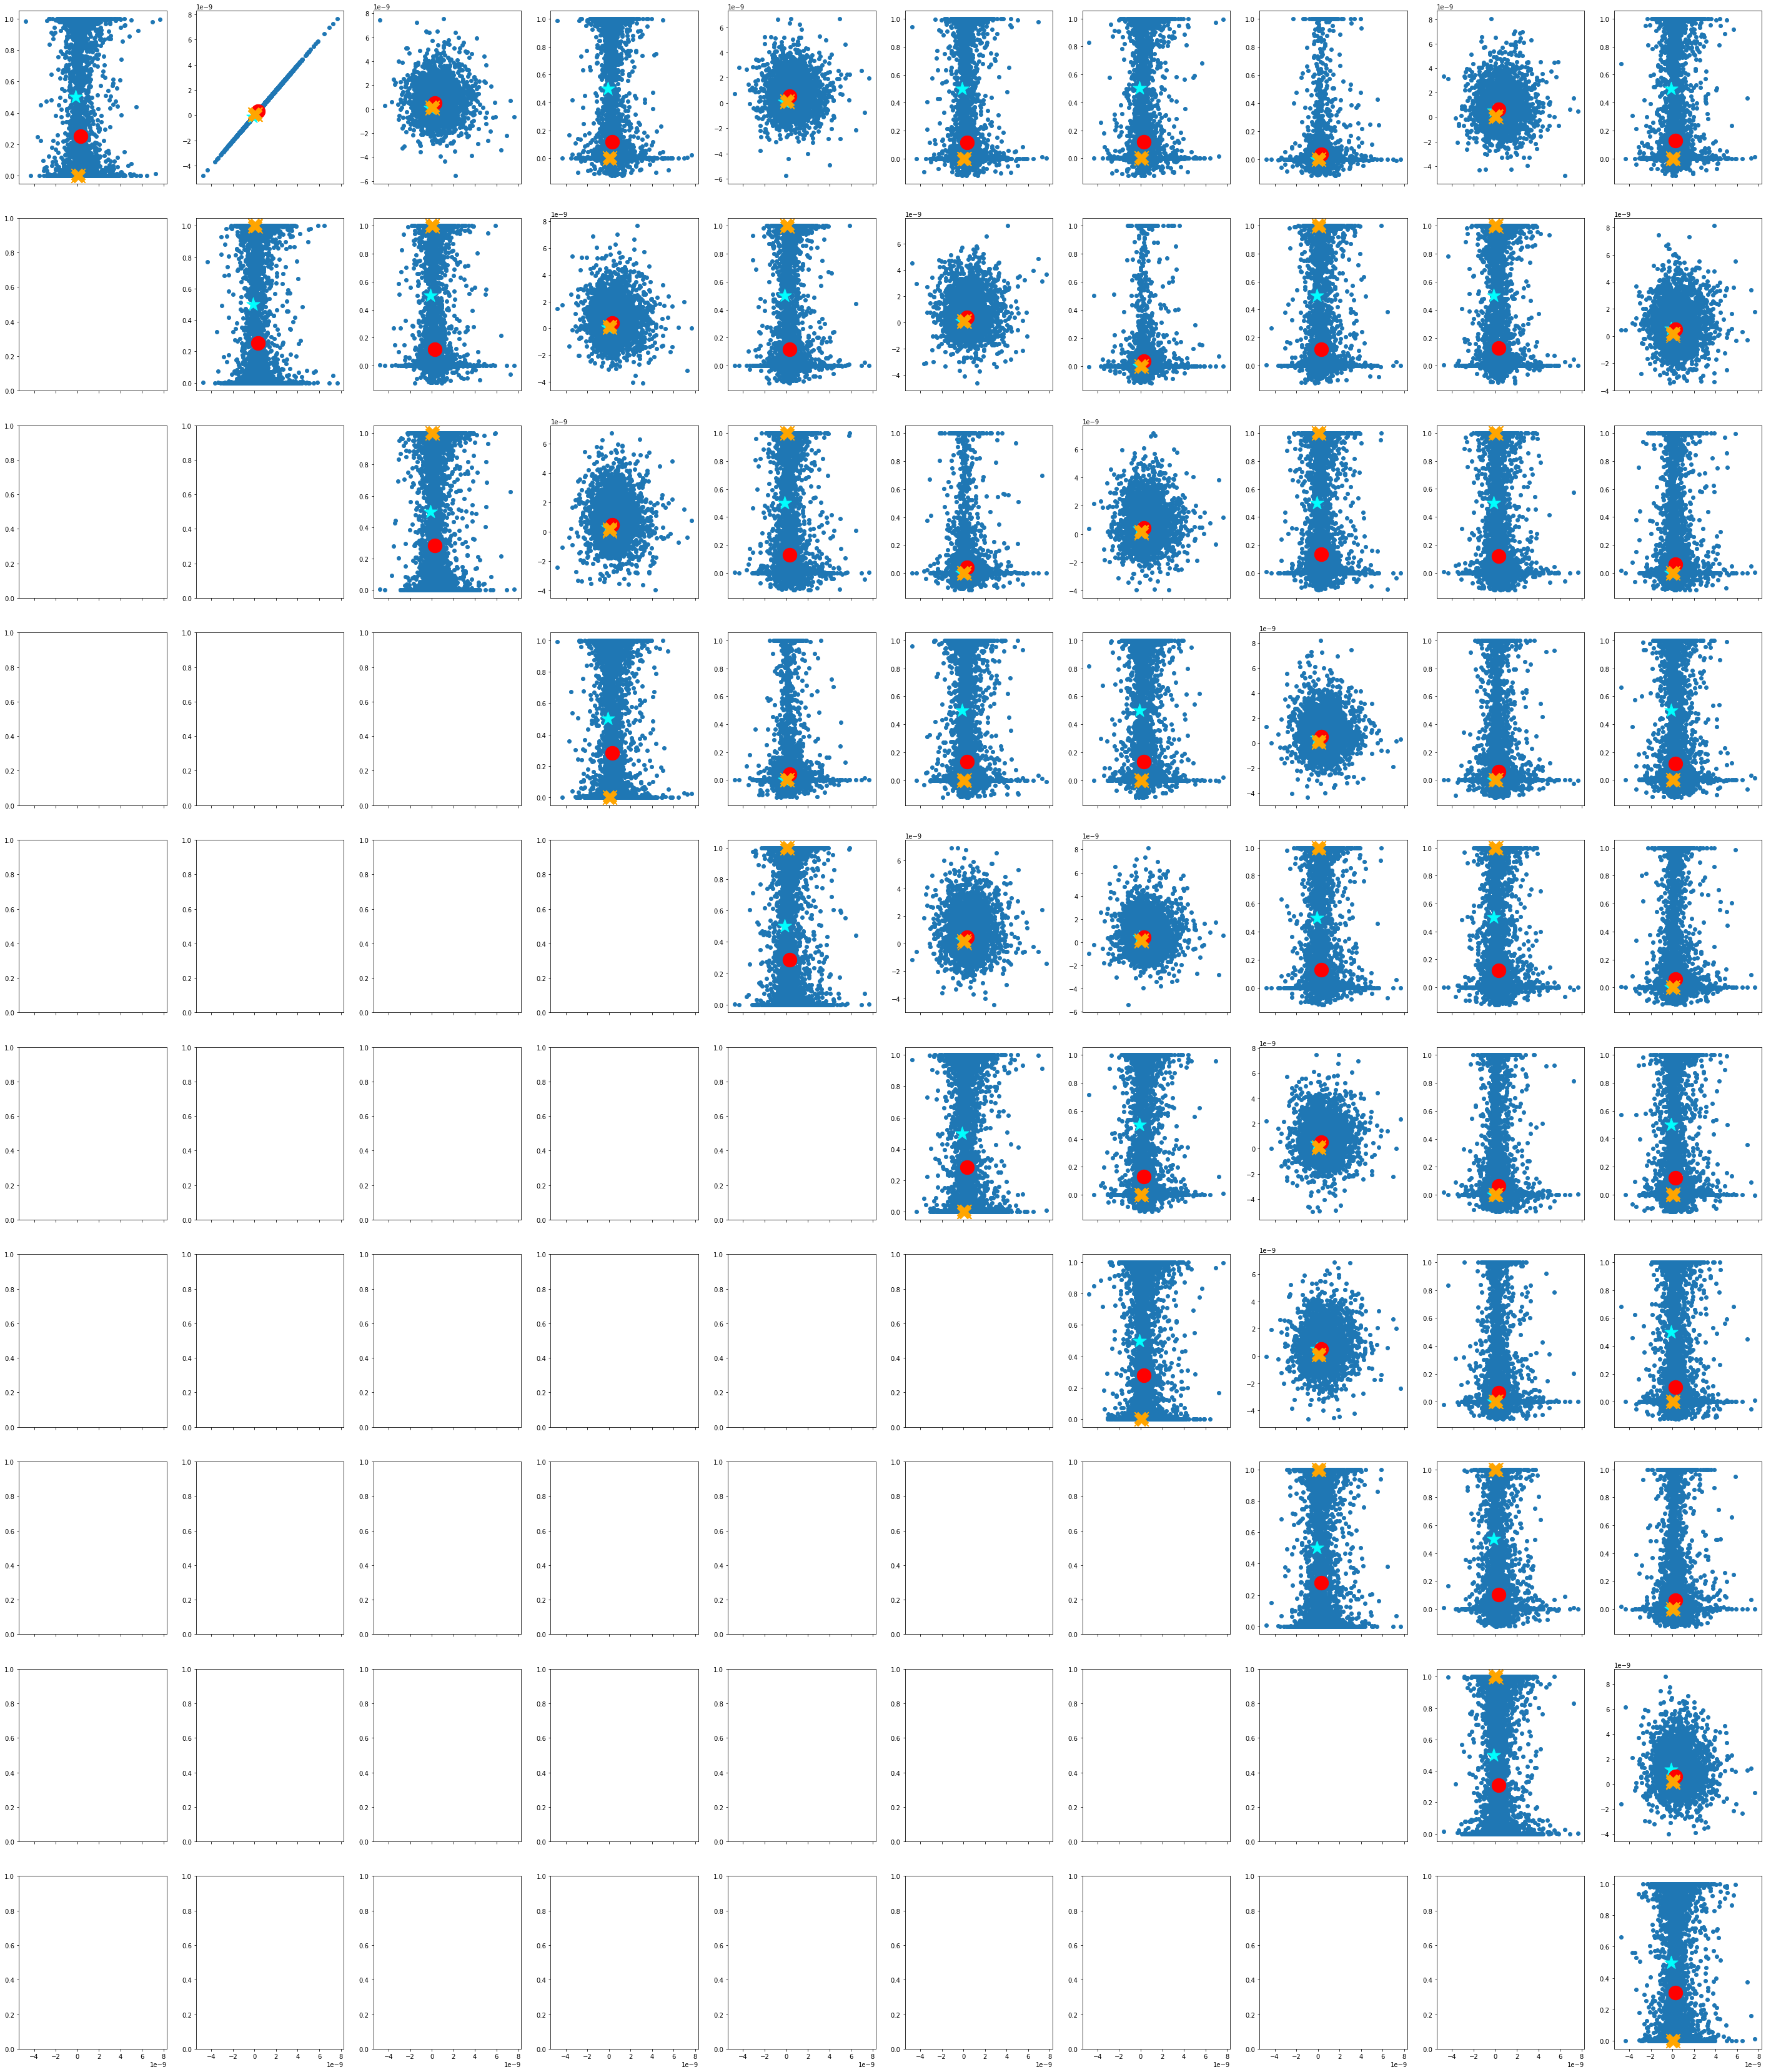

In [172]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for i in range(n):
    for j in range(i, n):
        axs[i, j].scatter(X_samples[:, row, col], X_samples[:, i, j])
        axs[i, j].scatter(X_val[row, col], X_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(X_center[row, col], X_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(X_fixed_point[row, col], X_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(X_path[:, row, col], X_path[:, i, j], c="orange", s=5e2, marker="x")

### Benson & Ye

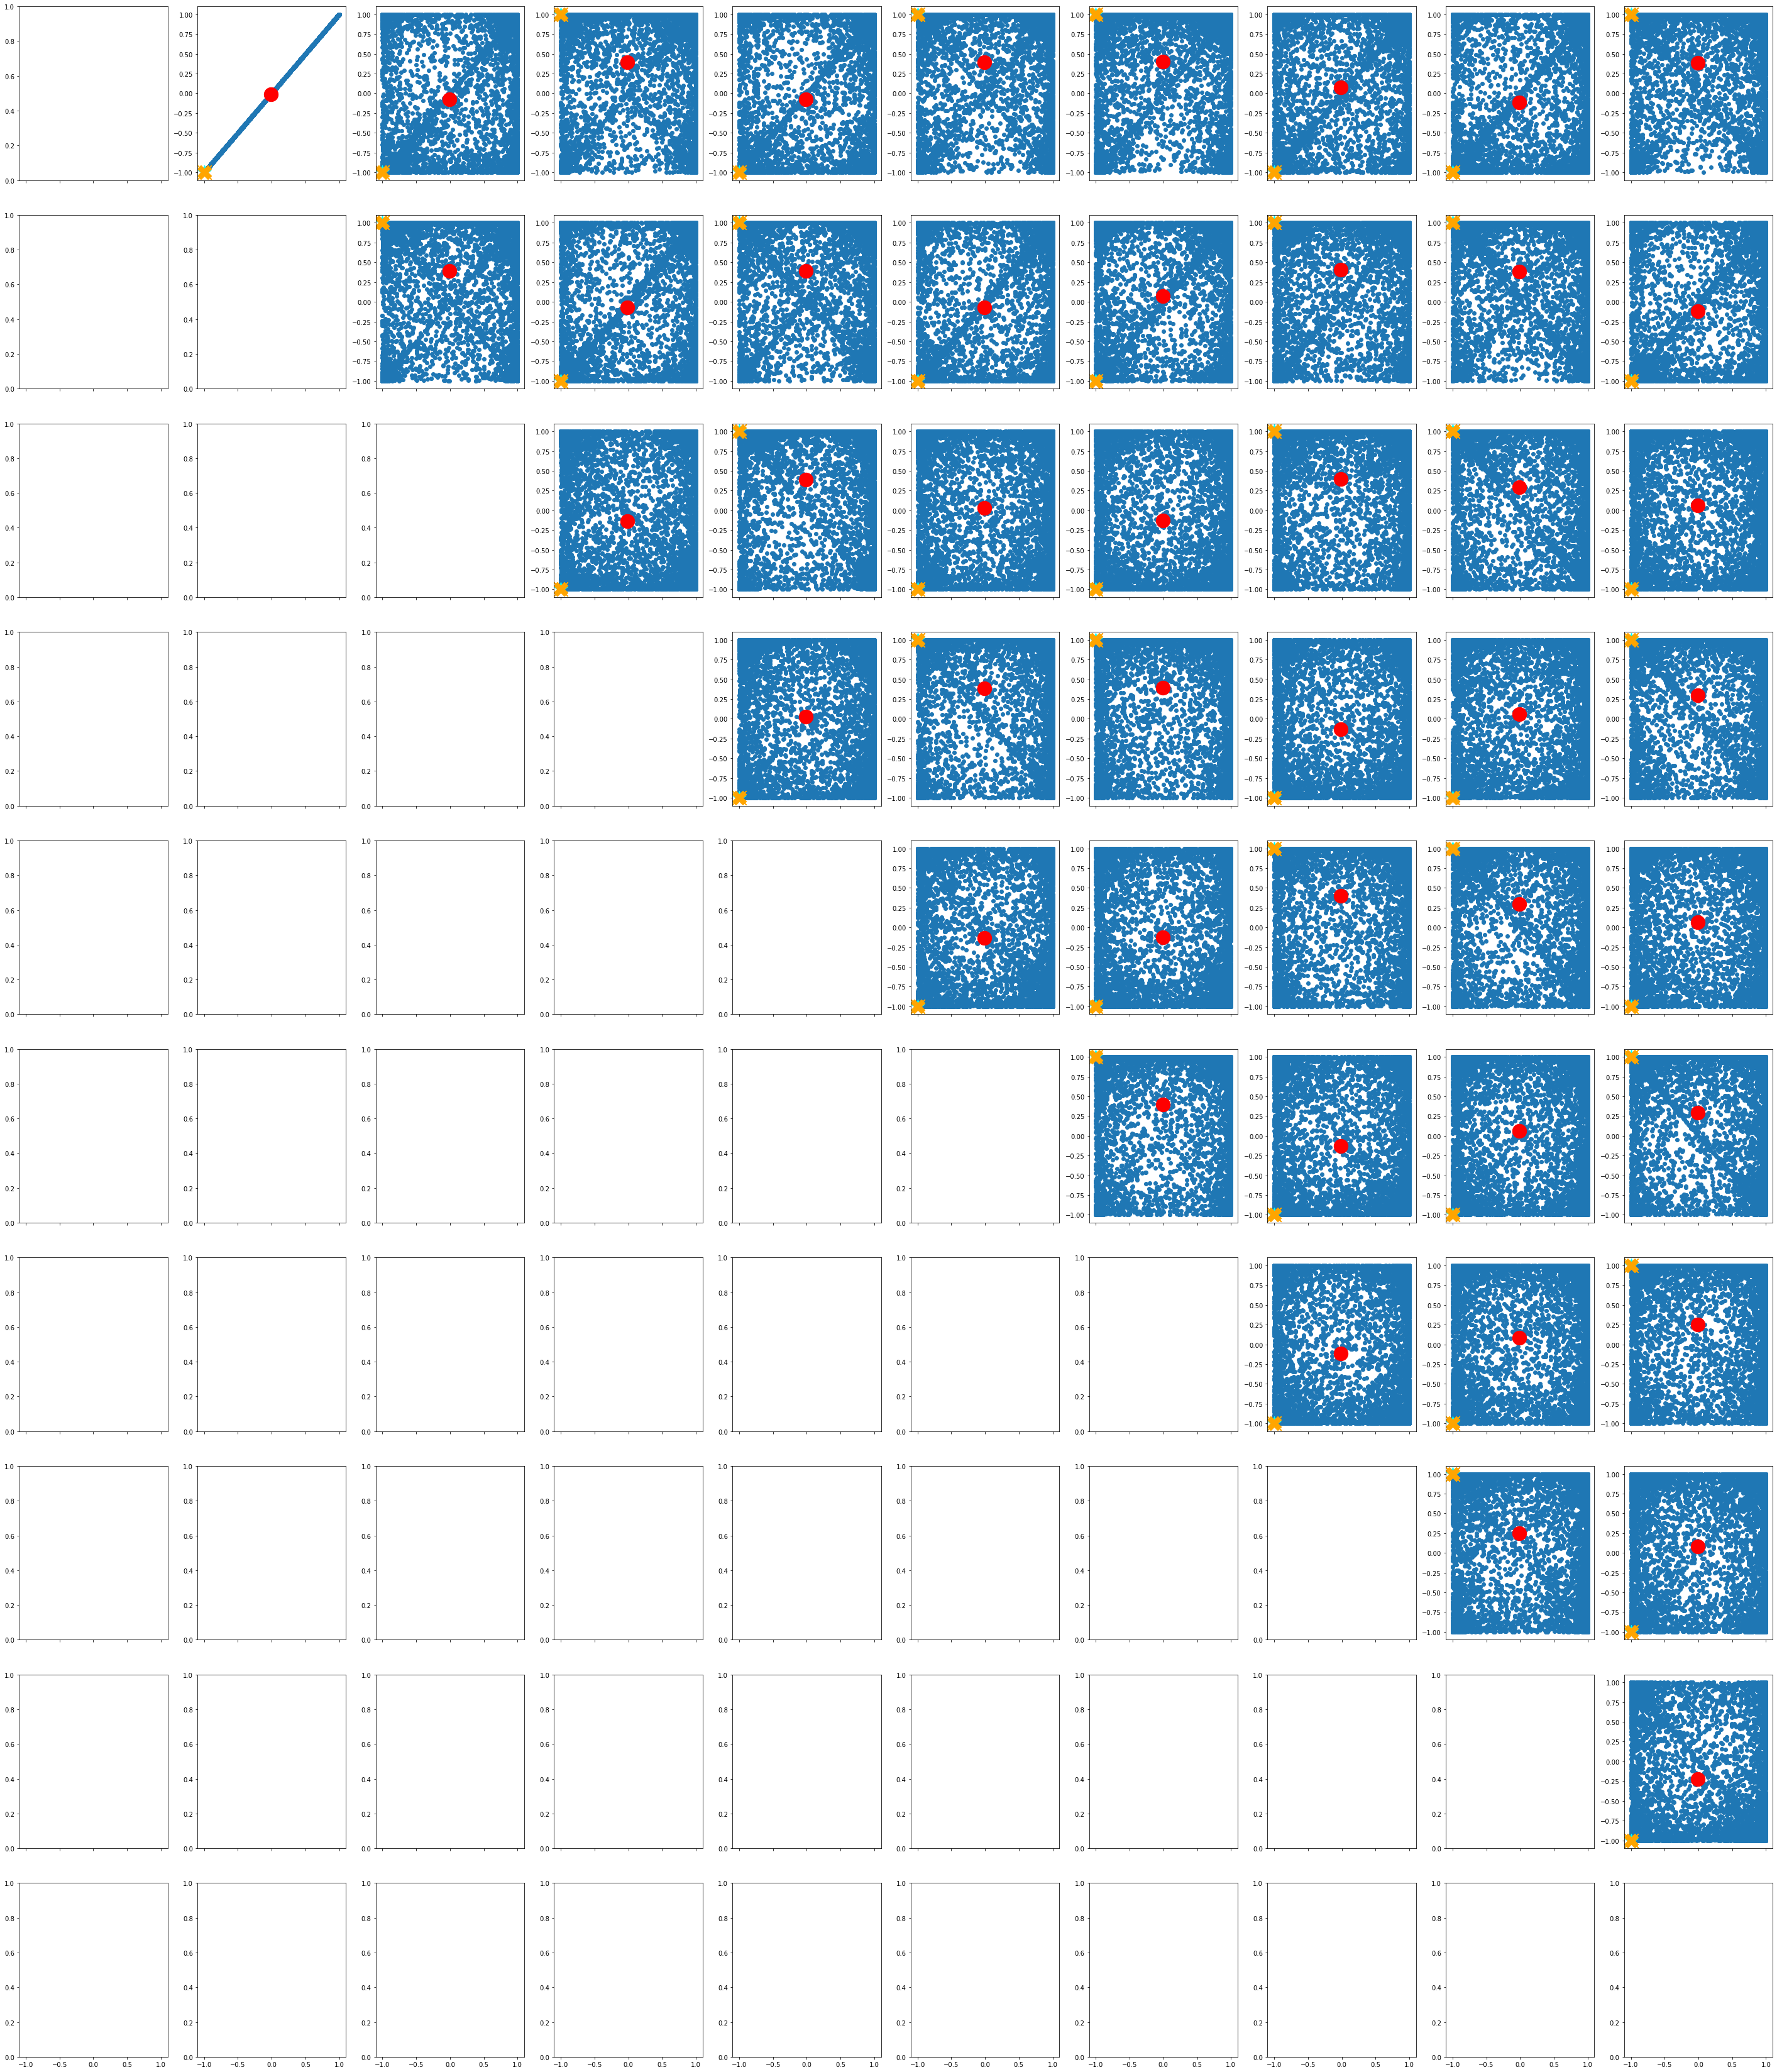

In [171]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

# omit the diagonal since it is constantly 1
for i in range(n):
    for j in range(i + 1, n):
        axs[i, j].scatter(V_samples[:, row, col], V_samples[:, i, j])
        axs[i, j].scatter(V_val[row, col], V_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(V_center[row, col], V_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(V_fixed_point[row, col], V_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(V_path[:, row, col], V_path[:, i, j], c="orange", s=5e2, marker="x")